# WISCONSIN BREAST CANCER DATASET 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
dt = pd.read_csv("data2.csv")
dt

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [31]:
dt.shape

(569, 33)

In [32]:
dt.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [33]:
# removing id and unnamed: 32 column which is not necessary for our model
ds = dt.drop(['id','Unnamed: 32'],axis = 1)
ds

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
pd.DataFrame.info(ds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [36]:
pd.DataFrame.describe(ds)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

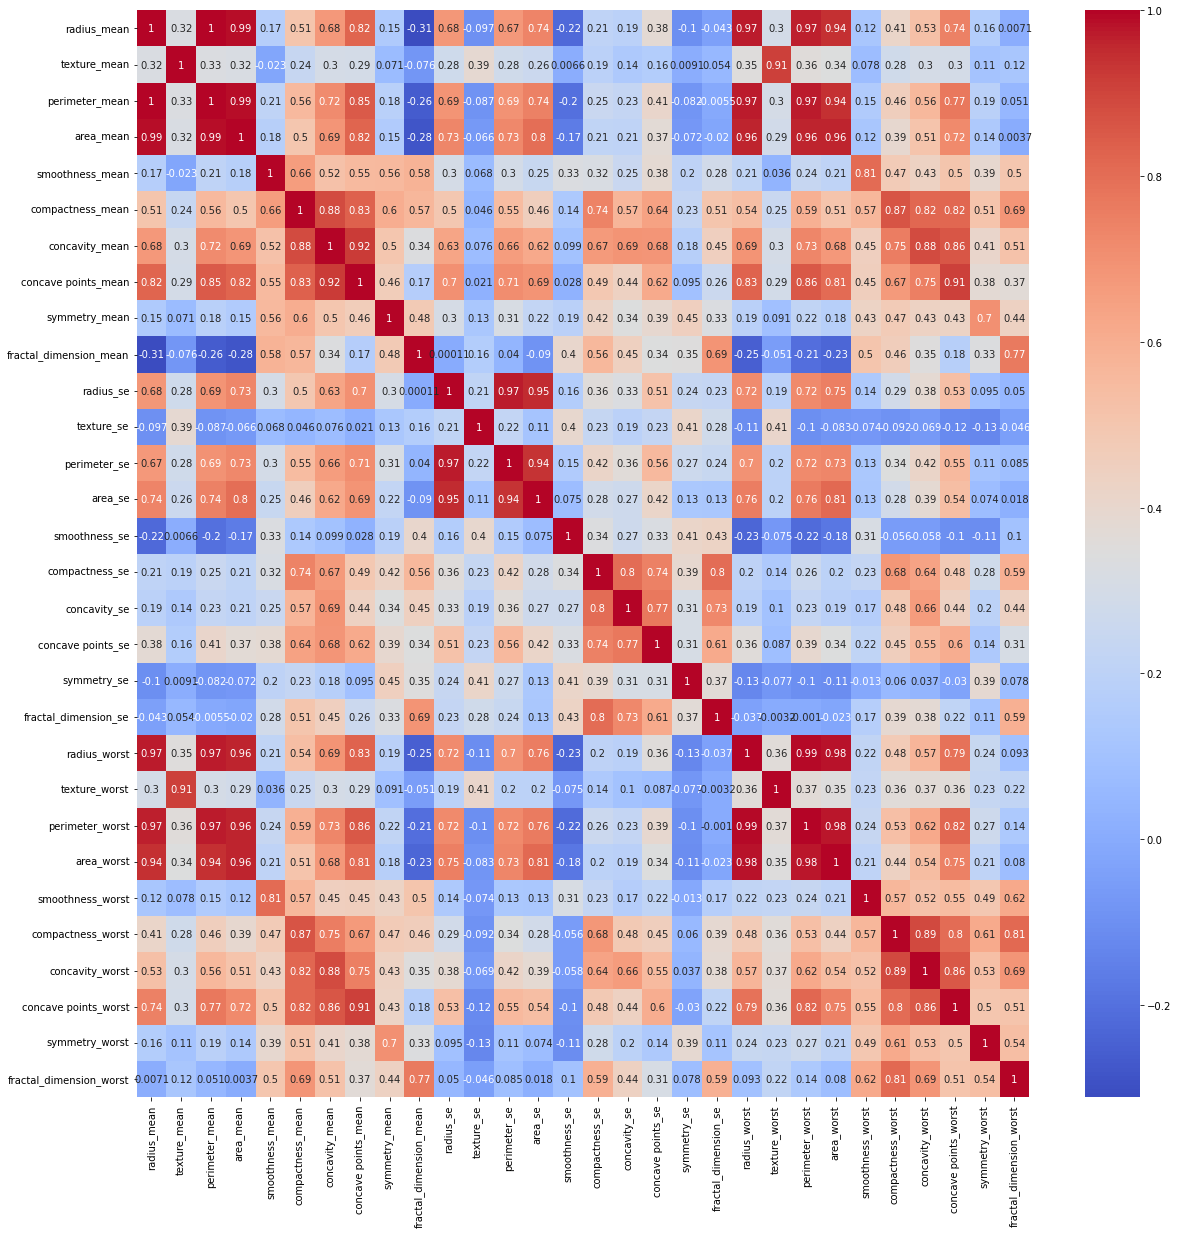

In [37]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm')

In [38]:
b = dt[dt.diagnosis == 'B'].shape[0]
m = dt[dt.diagnosis == 'M'].shape[0]
dif = b-m

print("Bening samples:", b)
print("Malignant samples:", m)
print("Difference of samples:", dif)

Bening samples: 357
Malignant samples: 212
Difference of samples: 145


https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data
https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

Undersampling, oversampling and generating synthetic data

These methods are often presented as great ways to balance the dataset before fitting a classifier on it. In a few words, these methods act on the dataset as follows:

undersampling consists in sampling from the majority class in order to keep only a part of these points
oversampling consists in replicating some points from the minority class in order to increase its cardinality
generating synthetic data consists in creating new synthetic points from the minority class (see SMOTE method for example) to increase its cardinality

In [39]:
# Undersampling the bening tumor data

# "loc" to access all the rows with the diagnosis outcome "bening".(16)
dsb = ds.loc[ds["diagnosis"] == "B"]
dsm = ds.loc[ds["diagnosis"] == "M"]

dsb_under = ds.sample(212)

In [40]:
dsb_under

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
372,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.690,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
163,B,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,...,13.580,28.68,87.36,553.0,0.1452,0.2338,0.1688,0.08194,0.2268,0.09082
283,M,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,...,18.550,25.09,126.90,1031.0,0.1365,0.4706,0.5026,0.17320,0.2770,0.10630
422,B,11.610,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,12.640,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.11050,0.2787,0.07427
510,B,11.740,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,...,12.450,17.60,81.25,473.8,0.1073,0.2793,0.2690,0.10560,0.2604,0.09879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,M,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.600,24.13,135.10,1321.0,0.1280,0.2297,0.2623,0.13250,0.3021,0.07987
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,...,9.077,30.92,57.17,248.0,0.1256,0.0834,0.0000,0.00000,0.3058,0.09938
396,B,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,...,14.800,27.20,97.33,675.2,0.1428,0.2570,0.3438,0.14530,0.2666,0.07686
249,B,11.520,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,...,12.650,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809


In [41]:
df = pd.concat([dsb_under, dsm], ignore_index=True)
pd.DataFrame.describe(df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,15.854450,20.455991,104.026887,823.363443,0.099386,0.123428,0.124532,0.068305,0.187112,0.062493,...,18.715264,27.414222,124.293113,1153.058019,0.138160,0.311527,0.358388,0.146627,0.305763,0.087306
std,3.803908,4.172614,26.240460,401.803265,0.013696,0.057313,0.086382,0.042570,0.028412,0.007087,...,5.183142,6.089782,36.000680,642.580002,0.023424,0.178918,0.218783,0.067990,0.069211,0.020332
min,7.729000,10.380000,47.920000,178.800000,0.052630,0.023440,0.000000,0.000000,0.121500,0.049960,...,8.952000,12.490000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.877500,17.695000,83.155000,514.300000,0.090065,0.078635,0.052605,0.029170,0.166175,0.056970,...,14.657500,23.537500,94.432500,653.600000,0.122600,0.180675,0.194100,0.089167,0.262100,0.073500
50%,15.355000,20.260000,101.850000,728.200000,0.099250,0.114700,0.114700,0.066105,0.184400,0.061295,...,18.025000,27.175000,121.750000,989.050000,0.138450,0.274700,0.345200,0.154600,0.294800,0.082215
75%,18.780000,22.910000,123.025000,1089.000000,0.108250,0.157625,0.170550,0.094290,0.203025,0.066730,...,22.630000,31.472500,150.300000,1569.000000,0.152275,0.409200,0.495875,0.197400,0.330650,0.098708
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500
